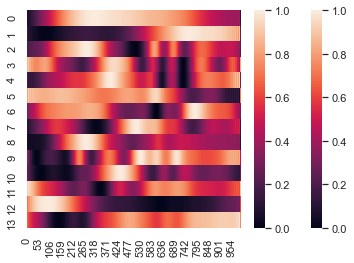

In [105]:
import numpy as np
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import math
import os
import glob
import seaborn as sns; sns.set()

# raw_dir = "C:\\Users\\ikang7\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\Opensim Data\\"
# norm_dir = "C:\\Users\\ikang7\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\norm_matrix\\"
raw_dir = "F:\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\Opensim Data\\"
norm_dir = "F:\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\norm_matrix\\"
window_size = 350
transition_point = 0.2

trial_pool = [1, 2, 3]
subject_pool = [12]
mode_pool = ["RA5"]
# mode_pool = ["RA2", "RA3", "RA4", "RA5", "RD2", "RD3", "RD4", "RD5","SA1", "SA2", "SA3", "SA4", "SD1", "SD2", "SD3", "SD4"]
leg_pool = ["R"]
subject_pool = ["12"]
# subject_pool = ["06", "07", "08", "09", "10", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "23", "24", "25", "27" ,"28"]

# Reading Norm Matrix          
# norm_matrix = []
# for subject in [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27 ,28]:
#     norm_path = norm_dir+"AB"+str(subject)+"_norm.csv"
#     for data_read_path in glob.glob(norm_path):
#         data = pd.read_csv(data_read_path, header=None)
#         norm_matrix.append(data.values)

signal_t1 = []
signal_t2 = []
signal_vec = []
# Reading Data Files
for subject in subject_pool:
    for trial in trial_pool:
        for mode in mode_pool:
            for starting_leg in leg_pool:
                data_path = raw_dir+"AB"+str(subject)+"_"+str(mode)+"_S2_"+str(starting_leg)+"_T"+str(trial)+".csv"

                if os.path.exists(data_path) == 1:
                    for data_read_path in glob.glob(data_path):
                        data = pd.read_csv(data_read_path, header=0)
                        feature_data = data.iloc[:, :-3].to_numpy()
                        mode_label = data.iloc[:, -3].to_numpy()
              
                transition_mode_diff = np.where(np.diff(np.transpose(mode_label))!=0)[0]               
                transition_idx_1 = np.arange(0, transition_mode_diff[0]+1)
                transition_idx_2 = np.arange(transition_mode_diff[1]+1, len(mode_label))
                
                transition_1 = feature_data[transition_idx_1]
                transition_2 = feature_data[transition_idx_2]
                
                signal_t1.append(signal.resample(transition_1,1000))
                signal_t2.append(signal.resample(transition_2,1000))

    signal_t1 = (np.array(signal_t1[0]) + np.array(signal_t1[1]) + np.array(signal_t1[2])) / 3
    signal_t2 = (np.array(signal_t2[0]) + np.array(signal_t2[1]) + np.array(signal_t2[2])) / 3

    vec = np.ones((feature_data.shape[1], 4))
    for ii in np.arange(0,np.shape(feature_data)[1]):
        vec[ii,0] = np.max(signal_t1[:,ii])
        vec[ii,1] = np.min(signal_t1[:,ii])
        vec[ii,2] = np.max(signal_t2[:,ii])
        vec[ii,3] = np.min(signal_t2[:,ii])                
    signal_t1 = (signal_t1-vec[:,1])/(vec[:,0]-vec[:,1])
    signal_t2 = (signal_t2-vec[:,3])/(vec[:,2]-vec[:,3])
    ax = sns.heatmap(np.transpose(signal_t1))
            

                
                
                


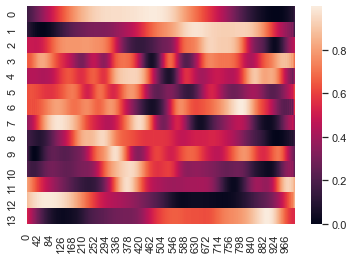

In [99]:
gait_phase = np.linspace(0, 100, num=1000)
ax = sns.heatmap(np.transpose(signal_vec))
# flights = sns.load_dataset("flights")
# print(flights)
# print(signal_t1.shape)

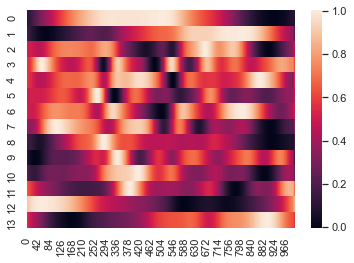

In [57]:
ax = sns.heatmap(np.transpose(signal_t11))

In [45]:
# print(np.shape(norm_matrix))
# print(np.shape(feature_data))
# normalized_data = (feature_data - norm_matrix[5][:,0])/norm_matrix[5][:,1]
# processing_data = (processing_data - norm_mat[:,0])/norm_mat[:,1]

vec = np.ones((feature_data.shape[1],2))
for ii in np.arange(0,np.shape(feature_data)[1]):
    vec[ii,0] = np.max(feature_data[:,ii])
    vec[ii,1] = np.min(feature_data[:,ii])

normalized_data = (feature_data-vec[:,1])/(vec[:,0]-vec[:,1])
print(vec)


[[ 43.33296522 -32.71511759]
 [  9.96687667 -13.97837768]
 [ -0.6124265   -1.64209406]
 [  0.91384828  -1.35564615]
 [  2.29274307  -1.9137057 ]
 [  1.35950459  -1.82093242]
 [  1.07722233  -1.86598261]
 [  1.24598061  -1.24546488]
 [ -0.15154017  -1.53423495]
 [  0.89779547  -0.42151597]
 [  0.98900956  -0.27569155]
 [  1.8369351   -3.85884879]
 [  4.13736504  -2.81197736]
 [  1.13554701  -1.03146755]]


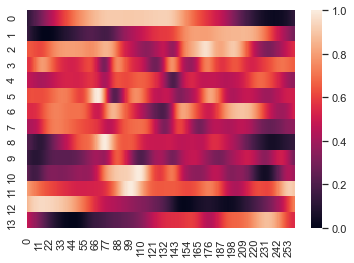

In [46]:
transition_mode_diff = np.where(np.diff(np.transpose(mode_label)) != 0)[1]
transition_idx_1 = np.arange(0, transition_mode_diff[0]+1)
transition_idx_2 = np.arange(transition_mode_diff[1]+1, len(mode_label))
# print(np.transpose(gait_phase))
ax = sns.heatmap(np.transpose(normalized_data[transition_idx_1,:]))
# ax = sns.heatmap(np.transpose(feature_data[transition_idx_2,:]))

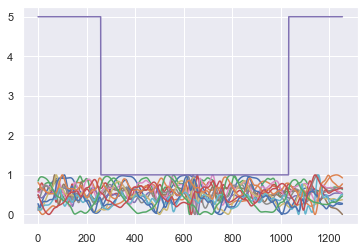

In [47]:
plt.plot(normalized_data)
plt.plot(mode_label)
plt.show()